In [131]:
import numpy as np
import pandas as pd
%matplotlib inline

# 1. Simple Exponential Smoothing

In [242]:
df = pd.read_csv('../data/global_economy.csv',index_col='Year',parse_dates=True)

In [243]:
df

Country Code           GDP    Growth         CPI    Imports  \
Year                                                                          
1960-01-01  Afghanistan  AFG  5.377778e+08       NaN         NaN   7.024793   
1961-01-01  Afghanistan  AFG  5.488889e+08       NaN         NaN   8.097166   
1962-01-01  Afghanistan  AFG  5.466667e+08       NaN         NaN   9.349593   
1963-01-01  Afghanistan  AFG  7.511112e+08       NaN         NaN  16.863910   
1964-01-01  Afghanistan  AFG  8.000000e+08       NaN         NaN  18.055555   
...                 ...  ...           ...       ...         ...        ...   
2013-01-01     Zimbabwe  ZWE  1.909102e+10  1.989493  109.079488  36.668735   
2014-01-01     Zimbabwe  ZWE  1.949552e+10  2.376929  108.847215  33.741470   
2015-01-01     Zimbabwe  ZWE  1.996312e+10  1.779873  106.224541  37.588635   
2016-01-01     Zimbabwe  ZWE  2.054868e+10  0.755869  104.560626  31.275493   
2017-01-01     Zimbabwe  ZWE  2.204090e+10  4.704035  105.511849  30.370273   

              Exports  Population  
Year                               
1960-01-01   4.132233   8996351.0  
1961-01-01   4.453443   9166764.0  
1962-01-01   4.878051   9345868.0  
1963-01-01   9.171601   9533954.0  
1964-01-01   8.888893   9731361.0  
...               ...         ...  
2013-01-01  21.987759  15054506.0  
2014-01-01  20.930146  15411675.0  
2015-01-01  19.160176  15777451.0  
2016-01-01  19.943532  16150362.0  
2017-01-01  19.658023  16529904.0  

[15150 rows x 8 columns]

In [244]:
df=df[df['Country'] == 'Algeria']

df

Country Code           GDP     Growth         CPI    Imports  \
Year                                                                       
1960-01-01  Algeria  DZA  2.723649e+09        NaN         NaN  67.143632   
1961-01-01  Algeria  DZA  2.434777e+09 -13.605441         NaN  67.503771   
1962-01-01  Algeria  DZA  2.001469e+09 -19.685042         NaN  20.818647   
1963-01-01  Algeria  DZA  2.703015e+09  34.313729         NaN  36.825515   
1964-01-01  Algeria  DZA  2.909352e+09   5.839413         NaN  29.439763   
1965-01-01  Algeria  DZA  3.136259e+09   6.206898         NaN  25.833078   
1966-01-01  Algeria  DZA  3.039835e+09  -4.804971         NaN  24.653572   
1967-01-01  Algeria  DZA  3.370843e+09   9.452963         NaN  21.631769   
1968-01-01  Algeria  DZA  3.852116e+09  10.796239         NaN  24.187254   
1969-01-01  Algeria  DZA  4.257219e+09   8.433280    2.569025  28.070758   
1970-01-01  Algeria  DZA  4.863487e+09   8.862657    2.738580  29.152668   
1971-01-01  Algeria  DZA  5.077222e+09 -11.331719    2.810513  27.663778   
1972-01-01  Algeria  DZA  6.761786e+09  27.423969    2.913274  25.726868   
1973-01-01  Algeria  DZA  8.715106e+09   3.813176    3.093106  31.589764   
1974-01-01  Algeria  DZA  1.320971e+10   7.494918    3.238470  35.489776   
1975-01-01  Algeria  DZA  1.555793e+10   5.045342    3.505006  42.965599   
1976-01-01  Algeria  DZA  1.772835e+10   8.386756    3.835554  37.118673   
1977-01-01  Algeria  DZA  2.097190e+10   5.258586    4.295409  41.740317   
1978-01-01  Algeria  DZA  2.636449e+10   9.214836    5.048133  40.168732   
1979-01-01  Algeria  DZA  3.324342e+10   7.477827    5.621026  32.865749   
1980-01-01  Algeria  DZA  4.234528e+10   0.790607    6.156025  30.338462   
1981-01-01  Algeria  DZA  4.434867e+10   2.999996    7.058181  30.877743   
1982-01-01  Algeria  DZA  4.520709e+10   6.400004    7.519963  28.998075   
1983-01-01  Algeria  DZA  4.880137e+10   5.400003    7.968691  25.802311   
1984-01-01  Algeria  DZA  5.369828e+10   5.599997    8.615462  27.466368   
1985-01-01  Algeria  DZA  5.793787e+10   3.699997    9.518560  26.742188   
1986-01-01  Algeria  DZA  6.369630e+10   0.400001   10.696159  23.171953   
1987-01-01  Algeria  DZA  6.674227e+10  -0.699998   11.492088  18.412110   
1988-01-01  Algeria  DZA  5.908907e+10  -1.000005   12.171448  22.603719   
1989-01-01  Algeria  DZA  5.563149e+10   4.400002   13.303923  28.514056   
1990-01-01  Algeria  DZA  6.204510e+10   0.800001   15.519364  24.937029   
1991-01-01  Algeria  DZA  4.571537e+10  -1.200001   19.536766  23.599765   
1992-01-01  Algeria  DZA  4.800330e+10   1.800002   25.723994  23.869490   
1993-01-01  Algeria  DZA  4.994646e+10  -2.100001   31.007786  23.138936   
1994-01-01  Algeria  DZA  4.254257e+10  -0.899997   40.014821  26.053713   
1995-01-01  Algeria  DZA  4.176405e+10   3.799995   51.931085  28.996229   
1996-01-01  Algeria  DZA  4.694150e+10   4.099998   61.631332  23.944700   
1997-01-01  Algeria  DZA  4.817786e+10   1.100000   65.164979  21.337600   
1998-01-01  Algeria  DZA  4.818775e+10   5.100004   68.390750  22.516097   
1999-01-01  Algeria  DZA  4.864057e+10   3.200002   70.200035  22.778999   
2000-01-01  Algeria  DZA  5.479025e+10   3.819678   70.438128  20.788626   
2001-01-01  Algeria  DZA  5.474471e+10   3.008395   73.414835  22.016858   
2002-01-01  Algeria  DZA  5.676029e+10   5.609323   74.456079  25.629632   
2003-01-01  Algeria  DZA  6.786383e+10   7.201872   77.634575  23.875943   
2004-01-01  Algeria  DZA  8.532500e+10   4.301624   80.710302  25.648200   
2005-01-01  Algeria  DZA  1.031982e+11   5.907791   81.826078  24.073404   
2006-01-01  Algeria  DZA  1.170273e+11   1.684488   83.717488  21.919326   
2007-01-01  Algeria  DZA  1.349771e+11   3.372875   86.797450  24.869963   
2008-01-01  Algeria  DZA  1.710007e+11   2.360135   91.014583  28.711177   
2009-01-01  Algeria  DZA  1.372110e+11   1.632244   96.236145  35.952678   
2010-01-01  Algeria  DZA  1.612073e+11   3.634145  100.00000

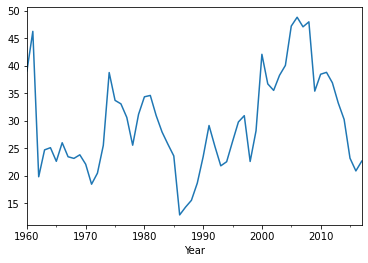

In [246]:
df['Exports'].plot();

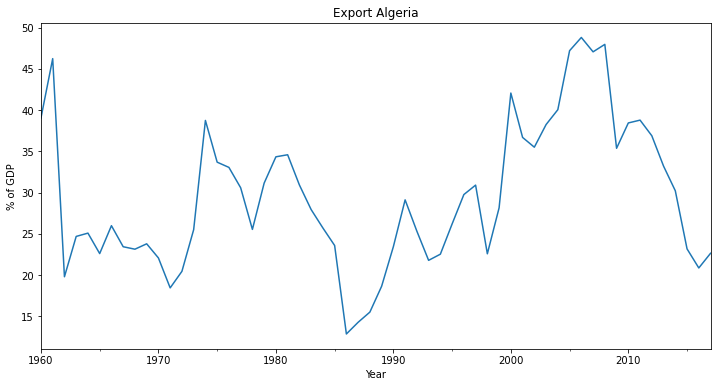

In [247]:
ax = df['Exports'].plot(figsize=(12,6))
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='% of GDP', title="Export Algeria");

A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas <tt>.ewm()</tt> method:<br>
$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

In [248]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

alpha = 0.8399875 

In [254]:
modelaux=SimpleExpSmoothing(df['Exports']).fit(smoothing_level=alpha,optimized=False)

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [255]:
df['SES_Export']=SimpleExpSmoothing(df['Exports']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
<ipython-input-255-bd18e3e4c478>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SES_Export']=SimpleExpSmoothing(df['Exports']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)


Country Code           GDP     Growth  CPI    Imports    Exports  \
Year                                                                           
1960-01-01  Algeria  DZA  2.723649e+09        NaN  NaN  67.143632  39.043173   
1961-01-01  Algeria  DZA  2.434777e+09 -13.605441  NaN  67.503771  46.244557   
1962-01-01  Algeria  DZA  2.001469e+09 -19.685042  NaN  20.818647  19.793873   
1963-01-01  Algeria  DZA  2.703015e+09  34.313729  NaN  36.825515  24.684682   
1964-01-01  Algeria  DZA  2.909352e+09   5.839413  NaN  29.439763  25.084059   

            Population  SES_Export  
Year                                
1960-01-01  11124888.0   39.043173  
1961-01-01  11404859.0   45.092245  
1962-01-01  11690153.0   23.841929  
1963-01-01  11985136.0   24.549831  
1964-01-01  12295970.0   24.998576

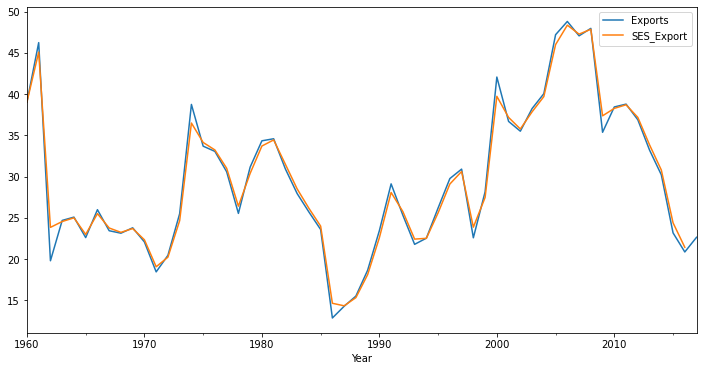

In [256]:
df[['Exports','SES_Export']].plot(figsize=(12,6));

In [109]:
 #    SimpleExpSmoothing.predict(params, start=None, end=None)




In [257]:
forecast=modelaux.forecast(5).rename('fc_export')


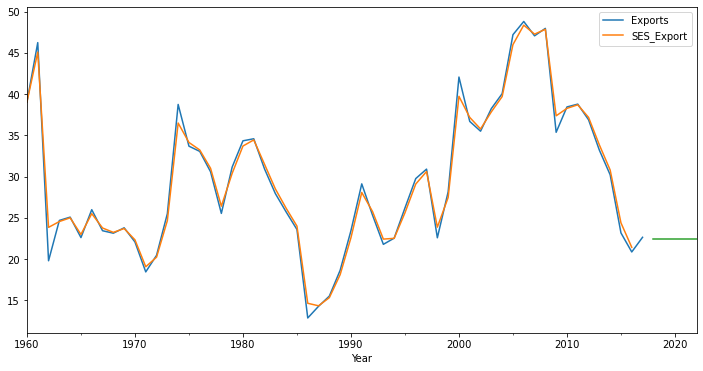

In [260]:
df[['Exports','SES_Export']].plot(figsize=(12,6));
forecast.plot();

### Alternative

In [120]:
#STEPS
# model=SimpleExpSmoothing(df['Exports'])
# fitted_model=model.fit(smoothing_level=alpha,optimized=False)
# df['SES_Export2']=fitted_model.fittedvalues.shift(-1)


In [110]:
model=SimpleExpSmoothing(df['Exports'])
model

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [111]:
fitted_model=model.fit(smoothing_level=alpha,optimized=False)
fitted_model

In [112]:
fitted_model.fittedvalues

Year
1960-01-01    39.043173
1961-01-01    39.043173
1962-01-01    45.092245
1963-01-01    23.841929
1964-01-01    24.549831
1965-01-01    24.998576
1966-01-01    22.987115
1967-01-01    25.506307
1968-01-01    23.765945
1969-01-01    23.236492
1970-01-01    23.700404
1971-01-01    22.333181
1972-01-01    19.065074
1973-01-01    20.228027
1974-01-01    24.659495
1975-01-01    36.494540
1976-01-01    34.137868
1977-01-01    33.227923
1978-01-01    31.009217
1979-01-01    26.411646
1980-01-01    30.390376
1981-01-01    33.706718
1982-01-01    34.446355
1983-01-01    31.488340
1984-01-01    28.509296
1985-01-01    26.157936
1986-01-01    23.995806
1987-01-01    14.637464
1988-01-01    14.330878
1989-01-01    15.319535
1990-01-01    18.108065
1991-01-01    22.589919
1992-01-01    28.073276
1993-01-01    25.760218
1994-01-01    22.420141
1995-01-01    22.513030
1996-01-01    25.605651
1997-01-01    29.095629
1998-01-01    30.616580
1999-01-01    23.864571
2000-01-01    27.464376
2001-01-01 

Note that the given we choose optimized=False, the fittedvalues have been shifted. There is a repetition for the first value. TO fix the values we have to shift the values back one.

In [113]:
fitted_model.fittedvalues.shift(-1)

Year
1960-01-01    39.043173
1961-01-01    45.092245
1962-01-01    23.841929
1963-01-01    24.549831
1964-01-01    24.998576
1965-01-01    22.987115
1966-01-01    25.506307
1967-01-01    23.765945
1968-01-01    23.236492
1969-01-01    23.700404
1970-01-01    22.333181
1971-01-01    19.065074
1972-01-01    20.228027
1973-01-01    24.659495
1974-01-01    36.494540
1975-01-01    34.137868
1976-01-01    33.227923
1977-01-01    31.009217
1978-01-01    26.411646
1979-01-01    30.390376
1980-01-01    33.706718
1981-01-01    34.446355
1982-01-01    31.488340
1983-01-01    28.509296
1984-01-01    26.157936
1985-01-01    23.995806
1986-01-01    14.637464
1987-01-01    14.330878
1988-01-01    15.319535
1989-01-01    18.108065
1990-01-01    22.589919
1991-01-01    28.073276
1992-01-01    25.760218
1993-01-01    22.420141
1994-01-01    22.513030
1995-01-01    25.605651
1996-01-01    29.095629
1997-01-01    30.616580
1998-01-01    23.864571
1999-01-01    27.464376
2000-01-01    39.732681
2001-01-01 

In [233]:
forecast=fitted_model.forecast(5).rename('fc_export')


/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [236]:
df['SES_Export2']=fitted_model.fittedvalues.shift(-1)
df

Region            State  Purpose       Trips   SES_Export2
Quarter                                                                     
1998 Q1         Adelaide  South Australia  Holiday  223.557406   9627.275658
1998 Q2         Adelaide  South Australia  Holiday  130.287369   9074.980420
1998 Q3         Adelaide  South Australia  Holiday  156.089398   9109.790772
1998 Q4         Adelaide  South Australia  Holiday  182.328980  11298.590375
1999 Q1         Adelaide  South Australia  Holiday  185.331880   9257.569628
...                  ...              ...      ...         ...           ...
2016 Q4  Yorke Peninsula  South Australia  Holiday   45.771405  12417.285514
2017 Q1  Yorke Peninsula  South Australia  Holiday   94.862095  10595.348692
2017 Q2  Yorke Peninsula  South Australia  Holiday   63.653642  10258.112795
2017 Q3  Yorke Peninsula  South Australia  Holiday   44.040781  10595.279342
2017 Q4  Yorke Peninsula  South Australia  Holiday  109.568587           NaN

[6080 rows x 5 columns]

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-119-81b173eb9a3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SES_ExFalse']=SimpleExpSmoothing(df['Exports']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency 

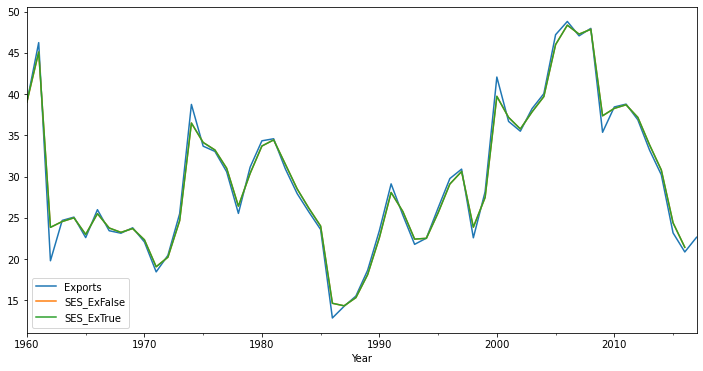

In [119]:
df['SES_ExFalse']=SimpleExpSmoothing(df['Exports']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df['SES_ExTrue'] =SimpleExpSmoothing(df['Exports']).fit(smoothing_level=alpha,optimized=True).fittedvalues.shift(-1)
df[['Exports','SES_ExFalse','SES_ExTrue']].plot(figsize=(12,6));

In [ ]:
forecast=

# 2. Methods with trend


## Holt’s linear trend method or Double Exponential Smoothing


In [261]:
df = pd.read_csv('../data/global_economy.csv',index_col='Year',parse_dates=True)
df=df[df['Code'] == 'AUS']
df['Pop']=df['Population']/1e6
df

Country Code           GDP    Growth         CPI    Imports  \
Year                                                                        
1960-01-01  Australia  AUS  1.857319e+10       NaN    7.960458  14.061746   
1961-01-01  Australia  AUS  1.964834e+10  2.485605    8.142560  15.025080   
1962-01-01  Australia  AUS  1.988801e+10  1.296478    8.116545  12.630927   
1963-01-01  Australia  AUS  2.150185e+10  6.214278    8.168574  13.834054   
1964-01-01  Australia  AUS  2.375854e+10  6.978724    8.402706  13.764495   
1965-01-01  Australia  AUS  2.593124e+10  5.983450    8.688866  15.267340   
1966-01-01  Australia  AUS  2.726173e+10  2.382491    8.975026  15.130228   
1967-01-01  Australia  AUS  3.038974e+10  6.302386    9.287201  13.893495   
1968-01-01  Australia  AUS  3.265763e+10  5.095868    9.521332  14.485597   
1969-01-01  Australia  AUS  3.662000e+10  7.044159    9.833507  13.334149   
1970-01-01  Australia  AUS  4.126106e+10  7.172182   10.171696  13.221323   
1971-01-01  Australia  AUS  4.513831e+10  4.003930   10.796046  12.936681   
1972-01-01  Australia  AUS  5.195444e+10  3.912691   11.446410  11.973557   
1973-01-01  Australia  AUS  6.372197e+10  2.613819   12.486993  11.020408   
1974-01-01  Australia  AUS  8.880914e+10  4.102589   14.412071  13.216722   
1975-01-01  Australia  AUS  9.714734e+10  1.350338   16.597294  14.735525   
1976-01-01  Australia  AUS  1.048947e+11  2.587946   18.808533  13.383726   
1977-01-01  Australia  AUS  1.101744e+11  3.597377   21.123829  14.653826   
1978-01-01  Australia  AUS  1.183093e+11  0.896770   22.814776  14.593920   
1979-01-01  Australia  AUS  1.346791e+11  4.043514   24.895942  15.360414   
1980-01-01  Australia  AUS  1.497382e+11  3.034207   27.419355  15.912642   
1981-01-01  Australia  AUS  1.765993e+11  3.337858   30.020812  16.744354   
1982-01-01  Australia  AUS  1.937217e+11  3.328119   33.428720  16.833742   
1983-01-01  Australia  AUS  1.769864e+11 -2.220144   36.784599  15.627413   
1984-01-01  Australia  AUS  1.931942e+11  4.581140   38.241415  15.009024   
1985-01-01  Australia  AUS  1.801910e+11  5.249206   40.816857  17.309665   
1986-01-01  Australia  AUS  1.819775e+11  4.055135   44.510926  18.086141   
1987-01-01  Australia  AUS  1.890412e+11  2.505324   48.309053  17.094011   
1988-01-01  Australia  AUS  2.356999e+11  5.681053   51.795005  16.644749   
1989-01-01  Australia  AUS  2.993176e+11  3.867597   55.697190  16.979151   
1990-01-01  Australia  AUS  3.108380e+11  3.564551   59.781478  17.070363   
1991-01-01  Australia  AUS  3.253583e+11 -0.387546   61.680541  16.191721   
1992-01-01  Australia  AUS  3.248781e+11  0.442616   62.304891  16.418939   
1993-01-01  Australia  AUS  3.115289e+11  4.039079   63.397503  17.894616   
1994-01-01  Australia  AUS  3.222013e+11  3.978534   64.646202  18.521413   
1995-01-01  Australia  AUS  3.672164e+11  3.829369   67.637877  19.884667   
1996-01-01  Australia  AUS  4.003027e+11  3.878631   69.406868  19.393138   
1997-01-01  Australia  AUS  4.345680e+11  3.966420   69.562955  18.900000   
1998-01-01  Australia  AUS  3.988991e+11  4.576739   70.161290  20.474854   
1999-01-01  Australia  AUS  3.883952e+11  5.018064   71.201873  20.802161   
2000-01-01  Australia  AUS  4.150342e+11  3.943189   74.375650  21.604155   
2001-01-01  Australia  AUS  3.782151e+11  1.933106   77.653486  22.148912   
2002-01-01  Australia  AUS  3.944867e+11  4.003022   79.968783  20.791227   
2003-01-01  Australia  AUS  4.662947e+11  2.985745   82.154006  21.209850   
2004-01-01  Australia  AUS  6.119043e+11  4.001106   84.079084  19.936527   
2005-01-01  Australia  AUS  6.926417e+11  3.190316   86.342352  21.029313   
2006-01-01  Australia  AUS  7.455219e+11  2.834233   89.412071  21.725808   
2007-01-01  Australia  AUS  8.519628e+11  3.777329   91.493236  21.876984   
2008-01-01  Australia  AUS  1.052585e+12  3.657767   95.473465  22.739099   
2009-01-01  Australia  AUS  9.264482e+11  1.922727   97.164412  22.826476   
2010-01-01

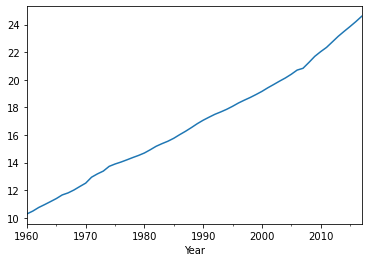

In [262]:
df['Pop'].plot();

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Year'>

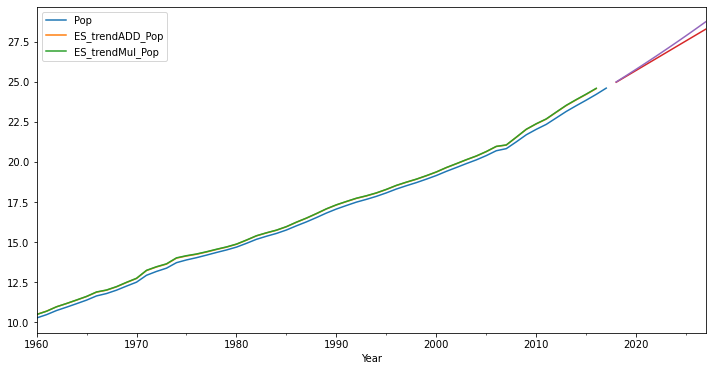

In [266]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model1        = ExponentialSmoothing(df['Pop'], trend='add')
fitted_model1 = model1.fit()
forecast1     = fitted_model1.forecast(10).rename('FC_Pop_1')
df['ES_trendADD_Pop']=fitted_model1.fittedvalues.shift(-1)

model2        = ExponentialSmoothing(df['Pop'], trend='mul')
fitted_model2 = model2.fit()
forecast2     =fitted_model2.forecast(10).rename('FC_Pop_2')
df['ES_trendMul_Pop']=fitted_model2.fittedvalues.shift(-1)

df[['Pop','ES_trendADD_Pop','ES_trendMul_Pop']].plot(figsize=(12,6));
forecast1.plot()
forecast2.plot()

In [135]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df['ES_Trend_Pop'] = ExponentialSmoothing(df['Pop'], trend='add').fit().fittedvalues.shift(-1)
df.head()

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Country Code           GDP    Growth       CPI    Imports  \
Year                                                                      
1960-01-01  Australia  AUS  1.857319e+10       NaN  7.960458  14.061746   
1961-01-01  Australia  AUS  1.964834e+10  2.485605  8.142560  15.025080   
1962-01-01  Australia  AUS  1.988801e+10  1.296478  8.116545  12.630927   
1963-01-01  Australia  AUS  2.150185e+10  6.214278  8.168574  13.834054   
1964-01-01  Australia  AUS  2.375854e+10  6.978724  8.402706  13.764495   

              Exports  Population        Pop  ES_trendADD_Pop  \
Year                                                            
1960-01-01  12.994452  10276477.0  10.276477        39.122477   
1961-01-01  12.403101  10483000.0  10.483000        45.103476   
1962-01-01  13.943012  10742000.0  10.742000        23.848909   
1963-01-01  13.005886  10950000.0  10.950000        24.550777   
1964-01-01  14.938248  11167000.0  11.167000        24.998618   

            ES_trendMul_Pop  ES_Trend_Pop  
Year                                       
1960-01-01        39.122477     10.500250  
1961-01-01        45.103476     10.701148  
1962-01-01        23.848909     10.973470  
1963-01-01        24.550777     11.173816  
1964-01-01        24.998618     11.388594

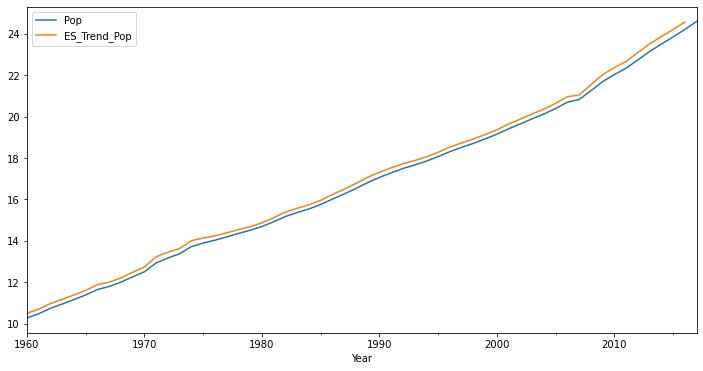

In [86]:
df[['Pop','ES_Trend_Pop']].plot(figsize=(12,6));

In [84]:
df['ES_Trend_Pop_mul'] = ExponentialSmoothing(df['Pop'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Country Code           GDP    Growth       CPI    Imports  \
Year                                                                      
1960-01-01  Australia  AUS  1.857319e+10       NaN  7.960458  14.061746   
1961-01-01  Australia  AUS  1.964834e+10  2.485605  8.142560  15.025080   
1962-01-01  Australia  AUS  1.988801e+10  1.296478  8.116545  12.630927   
1963-01-01  Australia  AUS  2.150185e+10  6.214278  8.168574  13.834054   
1964-01-01  Australia  AUS  2.375854e+10  6.978724  8.402706  13.764495   

              Exports  Population        Pop  ES_Trend_Pop  ES_Trend_Pop_mul  
Year                                                                          
1960-01-01  12.994452  10276477.0  10.276477     10.500250         10.488889  
1961-01-01  12.403101  10483000.0  10.483000     10.701148         10.697921  
1962-01-01  13.943012  10742000.0  10.742000     10.973470         10.975462  
1963-01-01  13.005886  10950000.0  10.950000     11.173816         11.180380  
1964-01-01  14.938248  11167000.0  11.167000     11.388594         11.397948

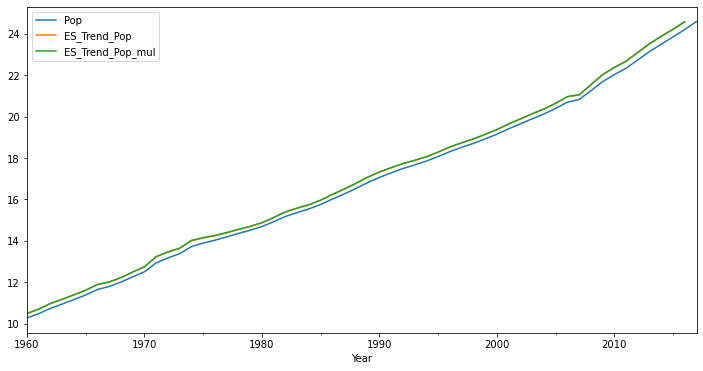

In [85]:
df[['Pop','ES_Trend_Pop','ES_Trend_Pop_mul']].plot(figsize=(12,6));

# 3. Methods with seasonality or Triple Exponential Smoothing

Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data.

In [208]:
df = pd.read_csv('../data/tourism.csv',index_col='Quarter',parse_dates=True)

In [209]:
df=df[df['Purpose'] == 'Holiday']
df

Region            State  Purpose       Trips
Quarter                                                       
1998 Q1         Adelaide  South Australia  Holiday  223.557406
1998 Q2         Adelaide  South Australia  Holiday  130.287369
1998 Q3         Adelaide  South Australia  Holiday  156.089398
1998 Q4         Adelaide  South Australia  Holiday  182.328980
1999 Q1         Adelaide  South Australia  Holiday  185.331880
...                  ...              ...      ...         ...
2016 Q4  Yorke Peninsula  South Australia  Holiday   45.771405
2017 Q1  Yorke Peninsula  South Australia  Holiday   94.862095
2017 Q2  Yorke Peninsula  South Australia  Holiday   63.653642
2017 Q3  Yorke Peninsula  South Australia  Holiday   44.040781
2017 Q4  Yorke Peninsula  South Australia  Holiday  109.568587

[6080 rows x 4 columns]

In [210]:
Trips = df.groupby(["Quarter"]).agg({
  "Trips" : ["sum"], 
  })

Trips.columns = ["_".join(x) for x in group_agg.columns.ravel()]

In [211]:
Trips['Trips']=Trips
Trips

T_______________r_______________i_______________p_______________s_______________________________s_______________u_______________m  \
Quarter                                                                                                                                      
1998 Q1                                       11806.037622                                                                                   
1998 Q2                                        9275.662074                                                                                   
1998 Q3                                        8642.488590                                                                                   
1998 Q4                                        9299.523781                                                                                   
1999 Q1                                       11172.027056                                                                                   
...                                                    ...                                                                                   
2016 Q4                                       10084.964670                                                                                   
2017 Q1                                       12406.418863                                                                                   
2017 Q2                                       10471.197262                                                                                   
2017 Q3                                       10499.165370                                                                                   
2017 Q4                                       11210.817760                                                                                   

                Trips  
Quarter                
1998 Q1  11806.037622  
1998 Q2   9275.662074  
1998 Q3   8642.488590  
1998 Q4   9299.523781  
1999 Q1  11172.027056  
...               ...  
2016 Q4  10084.964670  
2017 Q1  12406.418863  
2017 Q2  10471.197262  
2017 Q3  10499.165370  
2017 Q4  11210.817760  

[80 rows x 2 columns]

In [214]:
Trips=Trips.drop(columns=['T_______________r_______________i_______________p_______________s_______________________________s_______________u_______________m'])

In [216]:
Trips

Trips
Quarter              
1998 Q1  11806.037622
1998 Q2   9275.662074
1998 Q3   8642.488590
1998 Q4   9299.523781
1999 Q1  11172.027056
...               ...
2016 Q4  10084.964670
2017 Q1  12406.418863
2017 Q2  10471.197262
2017 Q3  10499.165370
2017 Q4  11210.817760

[80 rows x 1 columns]

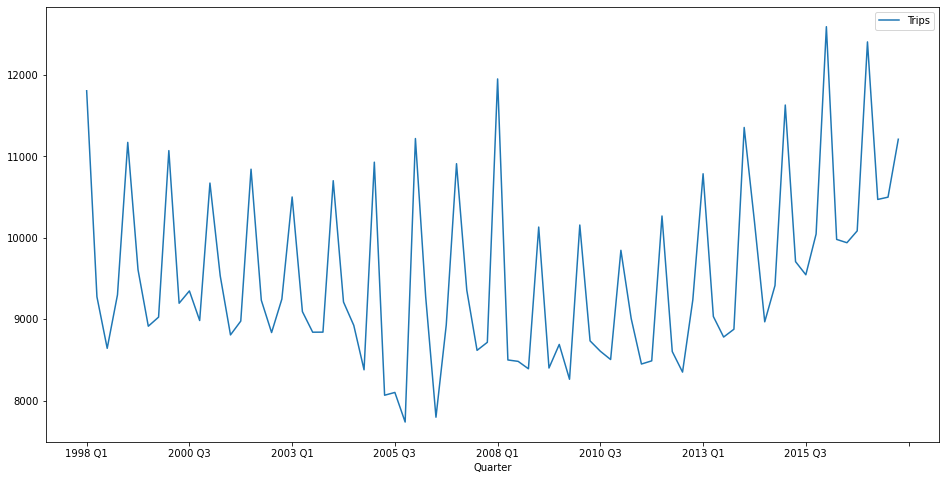

In [217]:

Trips['Trips'].plot(figsize=(16,8), legend=True);

In [218]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model       = ExponentialSmoothing(Trips['Trips'], trend='add', seasonal='add', seasonal_periods=4)
model

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [219]:
fitted_model=model.fit()
fitted_model

In [220]:
Trips['Trips_Fit']=fitted_model.fittedvalues
Trips

Trips     Trips_Fit
Quarter                            
1998 Q1  11806.037622  11383.928132
1998 Q2   9275.662074   9627.275658
1998 Q3   8642.488590   9074.980420
1998 Q4   9299.523781   9109.790772
1999 Q1  11172.027056  11298.590375
...               ...           ...
2016 Q4  10084.964670  10300.672801
2017 Q1  12406.418863  12417.285514
2017 Q2  10471.197262  10595.348692
2017 Q3  10499.165370  10258.112795
2017 Q4  11210.817760  10595.279342

[80 rows x 2 columns]

<AxesSubplot:xlabel='Quarter'>

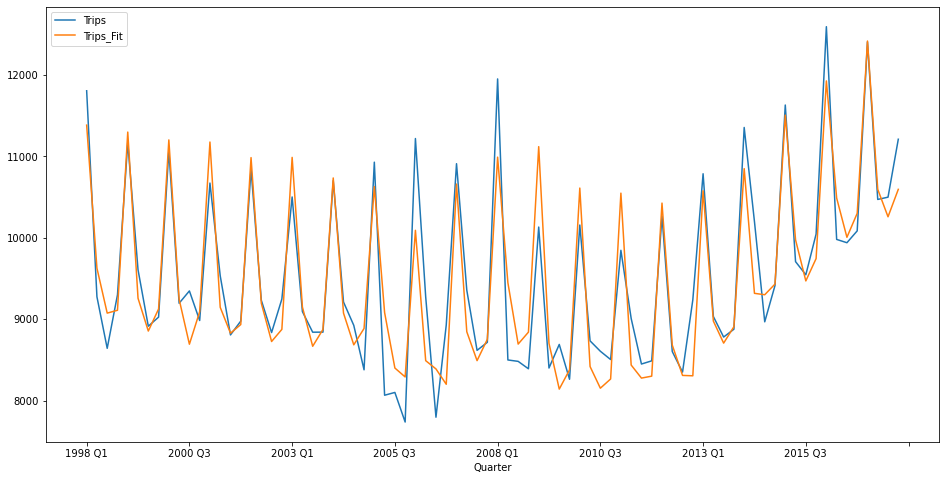

In [223]:
Trips.plot(figsize=(16,8))

In [225]:
model_mul       = ExponentialSmoothing(Trips['Trips'], trend='mul', seasonal='mul', seasonal_periods=4)
fitted_model_mul=model_mul.fit()
Trips['Trips_Fit_mul']=fitted_model_mul.fittedvalues



/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


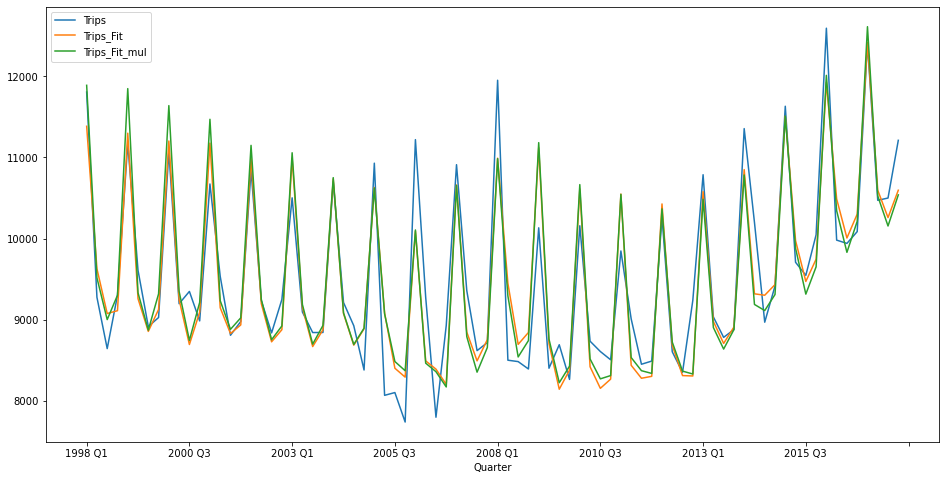

In [228]:
Trips.plot(figsize=(16,8));

### TO DO FORECASTTING

In [229]:
forecast = fitted_model_mul.forecast(8).rename('Trip Forecast')

/Users/peterpaz/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [230]:
forecast

80    13209.167918
81    11108.187855
82    10846.182315
83    11121.492894
84    13780.599621
85    11588.730668
86    11315.390706
87    11602.611286
Name: Trip Forecast, dtype: float64

<AxesSubplot:xlabel='Quarter'>

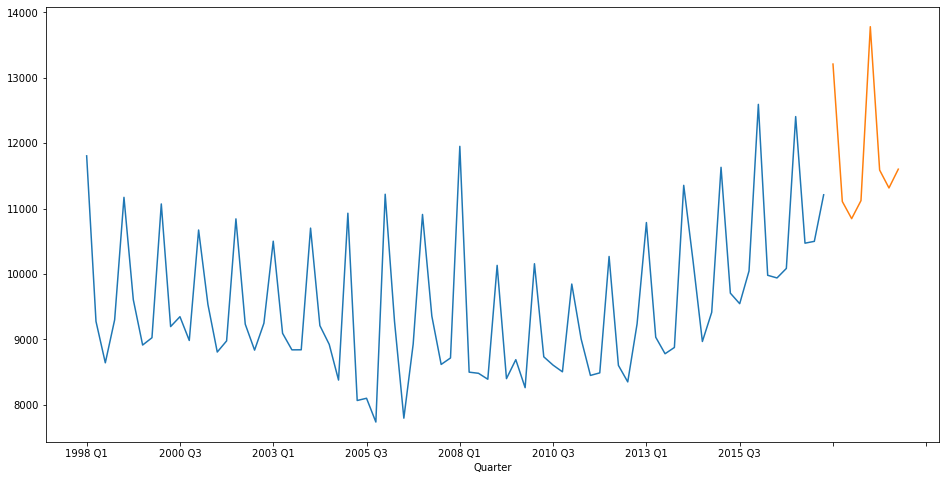

In [232]:
Trips['Trips'].plot(figsize=(16,8))
forecast.plot()